# Определение перспективного тарифа для телеком компании

**Цель:**  
Необходимо проанализировать поведение клиентов «Мегалайна» и сделать вывод — какой тариф лучше
  
**Исходные данные:**  
Данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год

**Вопросы, на которые необходимо дать ответы и план действий:**  
   1. Провести предобработку данных, описать причины возникновения ошибок
   2. Посчитать для каждого пользователя (по каждому месяцу): количество сделанных звонков и израсходованных минут разговора; количество отправленных сообщений; объем израсходованного интернет-трафика; помесячную выручку с каждого пользователя.
   3. Описать поведение клиентов оператора: сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение, построить гистограммы, описать распределения.
   4. Проверить гипотезы:
        * средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
        * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
   5. Сделать выводы, какой тариф лучше

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-данных-и-изучение-общей-информации" data-toc-modified-id="Открытие-данных-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие данных и изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Подготовка-таблиц" data-toc-modified-id="Подготовка-таблиц-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка таблиц</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропущенных-значений" data-toc-modified-id="Обработка-пропущенных-значений-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Обработка пропущенных значений</a></span></li><li><span><a href="#Подготовка-таблиц" data-toc-modified-id="Подготовка-таблиц-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Подготовка таблиц</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Изменение типа данных</a></span></li><li><span><a href="#Округление-значений-минут-и-мегабайтов" data-toc-modified-id="Округление-значений-минут-и-мегабайтов-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Округление значений минут и мегабайтов</a></span></li></ul></li><li><span><a href="#Группировка-данных" data-toc-modified-id="Группировка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Группировка данных</a></span><ul class="toc-item"><li><span><a href="#Таблица-internet-(информация-об-интернет-сессиях)" data-toc-modified-id="Таблица-internet-(информация-об-интернет-сессиях)-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Таблица internet (информация об интернет-сессиях)</a></span></li><li><span><a href="#Таблица-calls-(информация-о-звонках)" data-toc-modified-id="Таблица-calls-(информация-о-звонках)-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Таблица calls (информация о звонках)</a></span></li><li><span><a href="#Таблица-messages-(информация-о-сообщениях)" data-toc-modified-id="Таблица-messages-(информация-о-сообщениях)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Таблица messages (информация о сообщениях)</a></span></li></ul></li><li><span><a href="#Объединение-таблиц" data-toc-modified-id="Объединение-таблиц-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Объединение таблиц</a></span></li></ul></li><li><span><a href="#Определение-помесячной-выручки-с-каждого-пользователя" data-toc-modified-id="Определение-помесячной-выручки-с-каждого-пользователя-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Определение помесячной выручки с каждого пользователя</a></span></li><li><span><a href="#Анализ-поведения-клиентов-оператора" data-toc-modified-id="Анализ-поведения-клиентов-оператора-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ поведения клиентов оператора</a></span><ul class="toc-item"><li><span><a href="#Расчет-среднего-значения,-дисперсии-и-стандартного-отклонения" data-toc-modified-id="Расчет-среднего-значения,-дисперсии-и-стандартного-отклонения-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет среднего значения, дисперсии и стандартного отклонения</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Проверка-гипотезы:-средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается" data-toc-modified-id="Проверка-гипотезы:-средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различается-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается</a></span></li><li><span><a href="#Проверка-гипотезы:-средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Проверка-гипотезы:-средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Открытие данных и изучение общей информации

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    df_calls = pd.read_csv('/datasets/calls.csv', sep=',')
    df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
    df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
    df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
    df_users = pd.read_csv('/datasets/users.csv', sep=',')
except:
    df_calls = pd.read_csv('calls.csv', sep=',')
    df_internet = pd.read_csv('internet.csv', sep=',')
    df_messages = pd.read_csv('messages.csv', sep=',')
    df_tariffs = pd.read_csv('tariffs.csv', sep=',')
    df_users = pd.read_csv('users.csv', sep=',')

In [3]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [7]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


По открытым данным уже можно сделать несколько выводов: 
   * все даты имеют тип object, для дальнейшего анализа необходимо преобразовать в тип datetime
   * есть ненужные для анализа данные, которые в конечной (предобработанной) таблице не следует оставлять, например, Имя и Фамилия, у каждого пользователя есть уникальный id по которому мы и будем анализировать. 
   * в таблице `df_internet` при выгрузке появился дополнительный столбец не носящий смысловой нагрузки, его также в последствии удалим. 

## Предобработка данных

### Подготовка таблиц  
1. Подготовим таблицы удалив столбец Unnamed: 0 и переименовав id каждой таблицы в уникальный id.  
2. Обработаем пропущенные значения  
3. Проведем группировку по пользователю и по месяцу
4. Объедини таблицы по id и месяцу

#### Обработка пропущенных значений

Проверим, есть ли пропущенные значения в таблицах методом isna()

In [12]:
df_internet.isna().mean()

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

In [13]:
df_calls.isna().mean()

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

In [14]:
df_messages.isna().mean()

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

In [15]:
df_users.isna().mean()

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

Есть пропущенные значения столбца `churn_date` - дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных). Заменим NaN на 0 методом fillna()

In [16]:
df_users['churn_date'] = df_users['churn_date'].fillna(0)

In [17]:
df_users.isna().mean()

user_id       0.0
age           0.0
churn_date    0.0
city          0.0
first_name    0.0
last_name     0.0
reg_date      0.0
tariff        0.0
dtype: float64

Пропущенных значений не так много и их мы обработали, перед нами "слишком идеальные данные", но посыл ясен, нужно проработать иные темы. 

Проверим на недопустимость значений в таблицах

In [18]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [19]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [20]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


Все значения в диапазоне допустимых, продолжаем подготовку данных.

#### Подготовка таблиц

 Удалим столбец Unnamed: 0 и переименуем id каждой таблицы в уникальный id

In [21]:
df_internet = df_internet[['id', 'mb_used', 'session_date', 'user_id']]

In [22]:
df_internet.columns = ['id_internet', 'mb_used', 'session_date', 'user_id']

In [23]:
df_calls.columns = ['id_calls', 'call_date', 'duration', 'user_id']

In [24]:
df_messages.columns = ['id_message', 'message_date', 'user_id']

#### Изменение типа данных

Все столбцы со значением даты переведем из строкового типа в тип datetime:

In [25]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')

In [26]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')

In [27]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')

In [28]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

In [29]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')

#### Округление значений минут и мегабайтов

Округлим значения минут и мегабайов в соответствии с условиями задачи. Для округления используем метод ceil(), который округляет в бОльшую сторону. Выведем строки до и после для проверки правильности выполнения метода

In [30]:
df_internet.head()

,id_internet,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [31]:
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)

In [32]:
df_internet.head()

,id_internet,mb_used,session_date,user_id
0,1000_0,113.0,2018-11-25,1000
1,1000_1,1053.0,2018-09-07,1000
2,1000_2,1198.0,2018-06-25,1000
3,1000_3,551.0,2018-08-22,1000
4,1000_4,303.0,2018-09-24,1000


In [33]:
df_calls.head()

,id_calls,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [34]:
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [35]:
df_calls.head()

,id_calls,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


### Группировка данных

В каждой таблице (кроме описания тарифа) создаим столбец `month` для последующей группировки по месяцу и по `user_id`, так как данные необходимо проанализировать в разрезе каждого месяца. 

#### Таблица internet (информация об интернет-сессиях)

In [36]:
df_internet['month'] = df_internet['session_date'].values.astype('datetime64[M]')

In [37]:
report_internet = df_internet.groupby(['user_id', 'month'])[['mb_used']].agg(['sum']).reset_index()

In [38]:
report_internet.head()

,user_id,month,mb_used
,,,sum
0,1000,2018-05-01,2256.0
1,1000,2018-06-01,23257.0
2,1000,2018-07-01,14016.0
3,1000,2018-08-01,14070.0
4,1000,2018-09-01,14581.0


In [39]:
report_internet.columns = ['user_id', 'month', 'mb_used']

In [40]:
report_internet.head()

,user_id,month,mb_used
0,1000,2018-05-01,2256.0
1,1000,2018-06-01,23257.0
2,1000,2018-07-01,14016.0
3,1000,2018-08-01,14070.0
4,1000,2018-09-01,14581.0


#### Таблица calls (информация о звонках)

In [41]:
df_calls['month'] = df_calls['call_date'].values.astype('datetime64[M]')

In [42]:
report_calls = df_calls.groupby(['user_id', 'month'])[['duration']].agg(['sum']).reset_index()

In [43]:
report_calls.head()

,user_id,month,duration
,,,sum
0,1000,2018-05-01,159.0
1,1000,2018-06-01,172.0
2,1000,2018-07-01,340.0
3,1000,2018-08-01,408.0
4,1000,2018-09-01,466.0


In [44]:
report_calls.columns = ['user_id', 'month', 'duration']

In [45]:
report_calls.head()

,user_id,month,duration
0,1000,2018-05-01,159.0
1,1000,2018-06-01,172.0
2,1000,2018-07-01,340.0
3,1000,2018-08-01,408.0
4,1000,2018-09-01,466.0


#### Таблица messages (информация о сообщениях)

In [46]:
df_messages['month'] = df_messages['message_date'].values.astype('datetime64[M]')

In [47]:
report_messages = df_messages.groupby(['user_id', 'month']).agg('count').reset_index()

In [48]:
report_messages.head()

,user_id,month,id_message,message_date
0,1000,2018-05-01,22,22
1,1000,2018-06-01,60,60
2,1000,2018-07-01,75,75
3,1000,2018-08-01,81,81
4,1000,2018-09-01,57,57


In [49]:
report_messages = report_messages[['user_id', 'month', 'id_message']]

In [50]:
report_messages.columns = ['user_id', 'month', 'total_messages']

In [51]:
report_messages.head()

,user_id,month,total_messages
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57


### Объединение таблиц

С учетом вопросов, на которые необходимо ответить, необходимо объединить таблицы с информацией о звонках, о сообщениях и об интернет-сессиях. Общую таблицу обховем df для удобства

In [52]:
df = report_calls

Сумма значений столбца `duration` будем считать контрольной суммой, которая должна остаться неизменной по окончании объединения таблиц

In [53]:
df['duration'].sum()

1450301.0

Присоединим к таблице с информацией о звонках таблицу с информацией о сообщениях

In [54]:
df = df.merge(report_internet, on=['user_id', 'month'], how='outer')

In [55]:
df['duration'].sum()

1450301.0

Контрольная сумма совпадает, объединение прошло успешно. Присоединим таблицу с информацией об интернет-сессиях

In [56]:
df = df.merge(report_messages, on=['user_id', 'month'], how='outer')

In [57]:
df['duration'].sum()

1450301.0

Контрольная сумма совпадает, объединение прошло успешно. 

In [58]:
df.head()

,user_id,month,duration,mb_used,total_messages
0,1000,2018-05-01,159.0,2256.0,22.0
1,1000,2018-06-01,172.0,23257.0,60.0
2,1000,2018-07-01,340.0,14016.0,75.0
3,1000,2018-08-01,408.0,14070.0,81.0
4,1000,2018-09-01,466.0,14581.0,57.0


Проверим появление пустых значений:

In [59]:
df.isna().mean()

user_id           0.000000
month             0.000000
duration          0.012446
mb_used           0.003423
total_messages    0.154636
dtype: float64

Пустые значения есть, обработаем их, заполнив нулевыми значениями

In [60]:
for column in df.columns:
    df[column] = df[column].fillna(0)

In [61]:
df.isna().mean()

user_id           0.0
month             0.0
duration          0.0
mb_used           0.0
total_messages    0.0
dtype: float64

In [62]:
df['duration'].sum()

1450301.0

Контрольная сумма совпадает, пустые значения обработаны

In [63]:
df.head(10)

,user_id,month,duration,mb_used,total_messages
0,1000,2018-05-01,159.0,2256.0,22.0
1,1000,2018-06-01,172.0,23257.0,60.0
2,1000,2018-07-01,340.0,14016.0,75.0
3,1000,2018-08-01,408.0,14070.0,81.0
4,1000,2018-09-01,466.0,14581.0,57.0
5,1000,2018-10-01,350.0,14717.0,73.0
6,1000,2018-11-01,338.0,14768.0,58.0
7,1000,2018-12-01,333.0,9827.0,70.0
8,1001,2018-11-01,430.0,18452.0,0.0
9,1001,2018-12-01,414.0,14053.0,0.0


**Вывод**  
Для создания общей таблицы с информацией о звонках, сообщениях, интернет-сессиях мы отдельно обработали каждую таблицу от пропущенных значений и убрали ненужные столбцы, затем создали отдельные таблицы, которые являются сгруппированными по месяцам и user_id.  
Дальнейшую информацию, которая понадобиться для ответов на вопросы будем добавлять по мере необходимости, дабы не нагружать общую таблицу, используемую для анализа


## Определение помесячной выручки с каждого пользователя

Для определения выручки необходимо вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика, остаток умножить на значение из тарифного плана и прибавить абонентскую плату, соответствующую тарифному плану. Для начала добавим в df информцию о тарифе (чтобы не усложнять условия, выделим во временный датафрейм необходимые столбцы, чтобы объеденить данные из разных таблиц)

In [64]:
temp = df_users[['user_id', 'tariff']]

In [65]:
df = df.merge(temp, on='user_id', how='left')

In [66]:
df.columns = ['user_id', 'month', 'duration', 'mb_used', 'total_messages', 'tariff_name']

In [67]:
df.sample(5, random_state = 42)

,user_id,month,duration,mb_used,total_messages,tariff_name
506,1080,2018-12-01,904.0,4157.0,71.0,ultra
2513,1395,2018-12-01,627.0,16309.0,25.0,smart
354,1056,2018-05-01,462.0,17452.0,49.0,smart
1080,1173,2018-10-01,841.0,20752.0,14.0,smart
2389,1380,2018-08-01,629.0,33077.0,26.0,ultra


Определим выход за рамки безлимитного пакета, для этого создадим функцию определения выручки с каждого покупателя помесячно

In [68]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Создадим временную таблицу, которая содержит информацию о звонках, смс и потраченного интернет-трафика, а также добавим туда информацию по тарифам, а именно условия тарифов. В основную таблицу добавим только определяемую выручку


In [69]:
temp = df.copy()
temp = temp.merge(df_tariffs, on='tariff_name', how='left')

In [70]:
temp.head()

,user_id,month,duration,mb_used,total_messages,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,159.0,2256.0,22.0,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,172.0,23257.0,60.0,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,340.0,14016.0,75.0,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,408.0,14070.0,81.0,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,466.0,14581.0,57.0,ultra,1000,30720,3000,1950,150,1,1


In [71]:
def calc_revenue(row):
    #parametrs = [[500, 15360, 50, 3, 200, 3, 550], [3000, 30720, 1000, 1, 150, 1, 1950]]
    revenue = 0

    duration_not_limited = row['duration'] - row['minutes_included']
    if duration_not_limited < 0:
        duration_not_limited = 0
            
    mb_used_not_unlimited = row['mb_used'] - row['mb_used']
    if mb_used_not_unlimited < 0:
        mb_used_not_unlimited = 0
            
    message_not_unlimited = row['total_messages'] - row['messages_included']
    if message_not_unlimited < 0:
        message_not_unlimited = 0

    revenue = duration_not_limited * row['rub_per_minute'] + (mb_used_not_unlimited // 1024) * row['rub_per_gb'] + message_not_unlimited * row['rub_per_message'] + row['rub_monthly_fee']
    return revenue
    
df['revenue'] = temp.apply(calc_revenue, axis=1)   

In [72]:
df.head(15)

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue
0,1000,2018-05-01,159.0,2256.0,22.0,ultra,1950.0
1,1000,2018-06-01,172.0,23257.0,60.0,ultra,1950.0
2,1000,2018-07-01,340.0,14016.0,75.0,ultra,1950.0
3,1000,2018-08-01,408.0,14070.0,81.0,ultra,1950.0
4,1000,2018-09-01,466.0,14581.0,57.0,ultra,1950.0
5,1000,2018-10-01,350.0,14717.0,73.0,ultra,1950.0
6,1000,2018-11-01,338.0,14768.0,58.0,ultra,1950.0
7,1000,2018-12-01,333.0,9827.0,70.0,ultra,1950.0
8,1001,2018-11-01,430.0,18452.0,0.0,smart,550.0
9,1001,2018-12-01,414.0,14053.0,0.0,smart,550.0


**Вывод**  
В единую таблицу были собраны все необходимые данные для дальнейшего анализа, таблица получилась компактной по количеству столбцов, но для аналитика данных, это не является минусом.  

## Анализ поведения клиентов оператора

Проанализируем сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Для этого посчитаем среднее количество, дисперсию и стандартное отклонение данных параметров, построим гистограммы.

In [73]:
df

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue
0,1000,2018-05-01,159.0,2256.0,22.0,ultra,1950.0
1,1000,2018-06-01,172.0,23257.0,60.0,ultra,1950.0
2,1000,2018-07-01,340.0,14016.0,75.0,ultra,1950.0
3,1000,2018-08-01,408.0,14070.0,81.0,ultra,1950.0
4,1000,2018-09-01,466.0,14581.0,57.0,ultra,1950.0
...,...,...,...,...,...,...,...
3209,1489,2018-08-01,0.0,11066.0,17.0,smart,550.0
3210,1489,2018-09-01,0.0,17232.0,32.0,smart,550.0
3211,1489,2018-10-01,0.0,19588.0,21.0,smart,550.0
3212,1489,2018-11-01,0.0,17516.0,20.0,smart,550.0


Разделим 1 таблицу на 2 соответствующие двум тарифам: смарт и ультра

In [74]:
df_smart = df[df['tariff_name'] == 'smart']
df_ultra = df[df['tariff_name'] == 'ultra']

In [75]:
df_smart.sample(5, random_state=42)

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue
77,1010,2018-12-01,336.0,19230.0,0.0,smart,550.0
690,1111,2018-11-01,347.0,11412.0,2.0,smart,550.0
2356,1376,2018-11-01,291.0,19340.0,0.0,smart,550.0
280,1045,2018-06-01,229.0,16936.0,65.0,smart,595.0
1298,1204,2018-11-01,239.0,20507.0,0.0,smart,550.0


In [76]:
df_ultra.sample(5, random_state=42)

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue
2180,1350,2018-08-01,35.0,1621.0,2.0,ultra,1950.0
1697,1273,2018-05-01,220.0,0.0,21.0,ultra,1950.0
2428,1385,2018-01-01,270.0,19297.0,72.0,ultra,1950.0
1682,1270,2018-08-01,376.0,11596.0,47.0,ultra,1950.0
1035,1167,2018-10-01,727.0,15796.0,190.0,ultra,1950.0


### Расчет среднего значения, дисперсии и стандартного отклонения

Так как характеристики неустойчивы к выбросам, то предварительно проанализируем выбросы и уберем их из данных из данных, воспользовавшись построением ящиков с усами и методом quantile().

In [77]:
def create_boxplots(df):
    parametrs = {'duration':'Длительность звонков (мин./мес.)', 'mb_used':'Потраченный интернет-трафик (МБ/мес.)', 'total_messages':'Количество сообщений (шт./мес.)'}
    for parametr, parametr_synonym in parametrs.items():
        df.boxplot(parametr).set(title='Распределение параметров', ylabel=parametr_synonym)
        plt.show()
        df = df[(df[parametr] <= df[parametr].quantile(0.95)) & (df[parametr] >= df[parametr].quantile(0.05))]
    return df

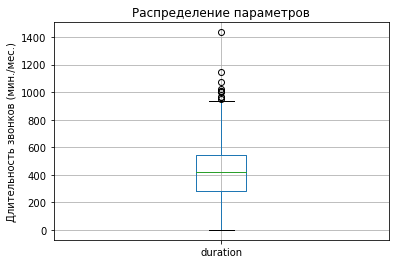

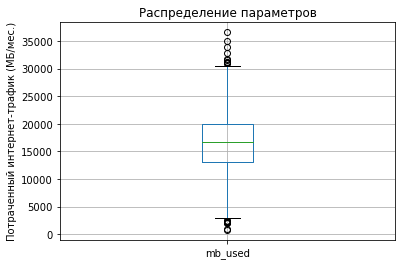

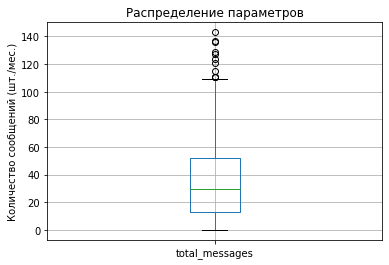

In [78]:
df_smart = create_boxplots(df_smart)

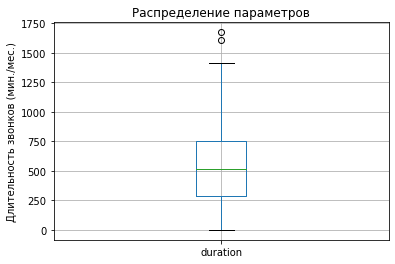

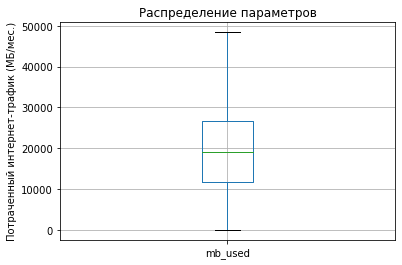

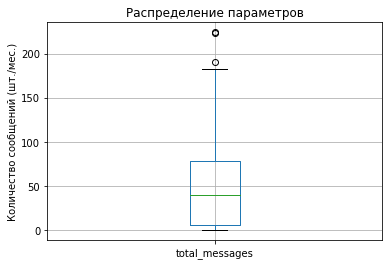

In [79]:
df_ultra = create_boxplots(df_ultra)

Заметим, что выбросов по тарифу ultra значительно меньше, чем по тарифу smart, это можно объяснить тем, что у тарифа ultra бОльший пакет (по размеру). Выбросы обработали, приступаем к определению основных статистических характеристик. 


Среднее значение и стандартное отклонение можно найти воспользовавшись методом describe() - строки `mean` и `std`. 

In [80]:
df_smart.describe()

,user_id,duration,mb_used,total_messages,revenue
count,1712.000000,1712.000000,1712.000000,1712.000000,1712.000000
mean,1242.687500,424.471379,16483.041472,31.195093,650.869743
std,146.032073,148.536347,4196.783007,23.534111,169.138270
min,1001.000000,97.000000,7424.000000,0.000000,550.000000
25%,1118.000000,310.000000,13475.000000,12.000000,550.000000
50%,1229.000000,428.000000,16601.500000,29.000000,550.000000
75%,1372.000000,539.000000,19653.000000,48.000000,673.750000
max,1499.000000,726.000000,25083.000000,86.000000,1312.000000


In [81]:
df_ultra.describe()

,user_id,duration,mb_used,total_messages,revenue
count,756.000000,756.000000,756.000000,756.000000,756.0
mean,1267.796296,527.866402,19082.855820,42.916667,1950.0
std,143.267252,249.415177,8193.762329,38.294013,0.0
min,1000.000000,28.000000,3668.000000,0.000000,1950.0
25%,1143.000000,338.000000,12465.250000,5.000000,1950.0
50%,1294.000000,524.000000,19045.500000,37.000000,1950.0
75%,1385.000000,723.000000,25440.750000,73.000000,1950.0
max,1495.000000,1087.000000,36910.000000,137.000000,1950.0


Дисперсию вычислим отдельно методом var() из библиотеки numpy

In [82]:
np.var(df_smart)

user_id           2.131291e+04
duration          2.205016e+04
mb_used           1.760270e+07
total_messages    5.535309e+02
revenue           2.859104e+04
dtype: float64

In [83]:
np.var(df_ultra)

user_id           2.049836e+04
duration          6.212564e+04
mb_used           6.704893e+07
total_messages    1.464492e+03
revenue           0.000000e+00
dtype: float64

С учетом округления значений звонков и мегабайт получились следующие значения:  
**Среднее значение**  
Для тарифа `smart` средними значениями являются:  
   * для звонков = 424 минут - что **не превышает** порогового значения по тарифу
   * для интернет-сессий = 16483 МБ - что **превышает** пороговое значение по тарифу
   * для сообщений = 31 шт. - что **не превышает** порогового значения по тарифу
  
Для тарифа `ultra` средними значениями являются:  
   * для звонков = 527 минуты - что **не превышает** порогового значения по тарифу
   * для интернет-сессий = 19088 МБ - что **не превышает** пороговое значение по тарифу
   * для сообщений = 42 шт. - что **не превышает** порогового значения по тарифу
  
  
**Дисперсия и стандартное отклонение**  
Для тарифа `smart` значениями стандартного отклонения являются:  
   * для звонков = 148 минут
   * для интернет-сессий = 4196 МБ
   * для сообщений = 23 шт.
  
Для тарифа `ultra` средними значениями являются:  
   * для звонков = 249 минуты
   * для интернет-сессий = 8193 МБ
   * для сообщений = 38 шт. 
  
Средние значения по звонкам и мегабайтам увеличились, а их стандартное отклонение и дисперсия уменьшились

In [84]:
def create_hist(df1, df2):
    parametrs = {'duration':'Длительность звонков (мин./мес.)', 'mb_used':'Потраченный интернет-трафик (МБ/мес.)', 'total_messages':'Количество сообщений (шт./мес.)'}
    for parametr, parametr_synonym in parametrs.items():
        ax = df1.plot(y=parametr, kind='hist', figsize=(7, 3), linewidth=5, alpha=0.7, label='Smart')
        df2.plot(y=parametr, kind='hist', figsize=(7, 3), linewidth=5, alpha=0.7, label='Ultra', ax=ax, grid=True, legend=True)
        plt.xlabel(parametr_synonym), plt.ylabel('Количество')
        plt.title('Распределение параметров')
        plt.show()

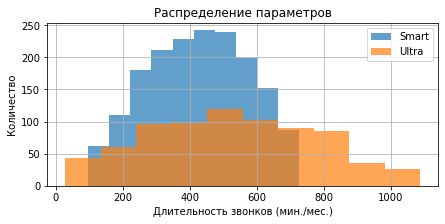

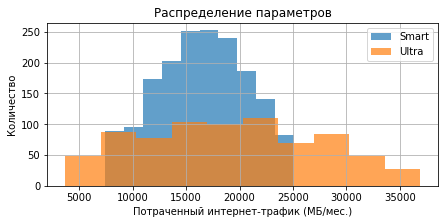

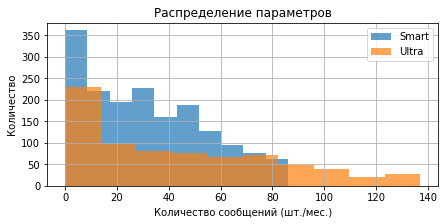

In [85]:
create_hist(df_smart, df_ultra)

**Распределения параметров тарифов**  
Выделим несколько видов распределения графиков: нормальное распределение (симметричный), скошенность в положительную сторону (вправо), скошенный в отрицательную сторону (влево) и иные, охарактеризуем каждый график.  
У тарифа `smart`:  
   * график распределения звонков имеет **скошенность влево (отрицательную)**
   * график распределения потреченного интернет-трафика имеет **скошенность влево (отрицательную)**
   * график распределения количества сообщений имеет форму **распределения Пуассона**
  
У тарифа `ultra`:  
   * график распределения звонков имеет **скошенность влево (отрицательную)**
   * график распределения потреченного интернет-трафика имеет **скошенность вправо (положительную)**
   * график распределения количества сообщений имеет форму **распределения Пуассона**


## Проверка гипотез

### Проверка гипотезы: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Начнём с формулировки нулевой гипотезы H₀ - *средняя выручка пользователей тарифов «Ультра» и «Смарт» не различается*, тогда альтернативной гипотезой H₁ будет: *средняя выручка пользователей тарифов «Ультра» и «Смарт» различается*

Воспользуемся гипотезой о равенстве средних двух генеральных совокупностей, Чтобы проверить гипотезу о равенстве среднего двух
генеральных совокупностей по взятым из них выборкам, примем метод scipy.stats.ttest_ind(). Методу передадим параметры: revenue_smart и revenue_ultra — массивы, содержащие выборки.

In [86]:
revenue_smart = df_smart['revenue']
revenue_ultra = df_ultra['revenue']
alpha = 0.05

In [87]:
results = st.ttest_ind(revenue_smart, revenue_ultra, equal_var=False)

In [88]:
print('p-значение =', results.pvalue)

p-значение = 0.0


In [89]:
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу, выручка одинаковая')

Отвергаем нулевую гипотезу


Отвергая нулевую гипотезу мы принимаем, что альтернативная гипотеза может быть правдой и что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

### Проверка гипотезы: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Для проверки данной гипотезы нам понадобится информация о городе проживания пользователей, добавим ее из таблицы df_users в основную таблицу df

In [90]:
temp = df_users[['user_id', 'city']]

In [91]:
temp.head()

,user_id,city
0,1000,Краснодар
1,1001,Москва
2,1002,Стерлитамак
3,1003,Москва
4,1004,Новокузнецк


In [92]:
df = df.merge(temp, on='user_id', how='outer')

In [93]:
df.head()

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue,city
0,1000,2018-05-01,159.0,2256.0,22.0,ultra,1950.0,Краснодар
1,1000,2018-06-01,172.0,23257.0,60.0,ultra,1950.0,Краснодар
2,1000,2018-07-01,340.0,14016.0,75.0,ultra,1950.0,Краснодар
3,1000,2018-08-01,408.0,14070.0,81.0,ultra,1950.0,Краснодар
4,1000,2018-09-01,466.0,14581.0,57.0,ultra,1950.0,Краснодар


Обработаем пару пропущенных значений:

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   month           3214 non-null   datetime64[ns]
 2   duration        3214 non-null   float64       
 3   mb_used         3214 non-null   float64       
 4   total_messages  3214 non-null   float64       
 5   tariff_name     3214 non-null   object        
 6   revenue         3214 non-null   float64       
 7   city            3216 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 226.1+ KB


In [95]:
df = df[df['revenue'].isna() == False]

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   datetime64[ns]
 2   duration        3214 non-null   float64       
 3   mb_used         3214 non-null   float64       
 4   total_messages  3214 non-null   float64       
 5   tariff_name     3214 non-null   object        
 6   revenue         3214 non-null   float64       
 7   city            3214 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 226.0+ KB


Разделим таблицу по городам: Москва и другие регионы

In [97]:
df_Moscow = df[df['city'] == 'Москва']

In [98]:
df_not_Moscow = df.query('city != "Москва"')

In [99]:
df_Moscow.sample(5, random_state=42)

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue,city
442,1068,2018-12-01,516.0,15435.0,29.0,smart,598.0,Москва
1301,1205,2018-11-01,214.0,20127.0,15.0,smart,550.0,Москва
390,1062,2018-11-01,405.0,6570.0,14.0,smart,550.0,Москва
3077,1481,2018-10-01,279.0,18258.0,25.0,smart,550.0,Москва
1589,1254,2018-06-01,562.0,22945.0,0.0,ultra,1950.0,Москва


In [100]:
df_not_Moscow.sample(5, random_state=42)

,user_id,month,duration,mb_used,total_messages,tariff_name,revenue,city
912,1147,2018-09-01,382.0,21697.0,35.0,smart,550.0,Якутск
1132,1179,2018-06-01,440.0,15833.0,0.0,smart,550.0,Вологда
2259,1362,2018-09-01,507.0,10688.0,13.0,smart,571.0,Владимир
531,1085,2018-07-01,195.0,8383.0,0.0,ultra,1950.0,Омск
2375,1378,2018-06-01,486.0,13554.0,17.0,smart,550.0,Иркутск


Аналогично пункту 5.1:  
Начнём с формулировки нулевой гипотезы H₀ - средняя выручка пользователей из Москвы не отличается (равна) средней выручке пользователей из других регионов, тогда альтернативной гипотезой H₁ будет: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. И испольхзуя аналогичный метод найдем уровень значимости (p-значение)

In [101]:
revenue_Moscow = df_Moscow['revenue']
revenue_not_Moscow = df_not_Moscow['revenue']
alpha = 0.05

In [102]:
results = st.ttest_ind(revenue_Moscow, revenue_not_Moscow, equal_var=False)

In [103]:
print('p-значение =', results.pvalue)

p-значение = 0.0025015199985346554


In [104]:
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу, выручка одинаковая')

Отвергаем нулевую гипотезу


Отвергнуть нулевую гипотезу не получилось, а значит можно сказать, что средняя выручка пользователей из Москвы не отличается (равна) средней выручке пользователей из других регионов

## Вывод

Нам необходимо было ответить на вопрос, какой тариф лучше: Smart или Ultra (исследуя разные характеристики тарифов)?  
  
Посмотрим на средние значения основных параметров тарифов и для сравнения также приведем информацию о безлимитном пакете:  

| Параметр (за месяц) | Тариф Smart | Тариф Smart (включено в пакет) | Тариф Ultra | Тариф Ultra (включено в пакет)|
| :------------- | -----:| -----:| -----:| -----:|
|Суммарная длительность звонков|424 минуты|500 минут|527 минут|3000 минут|
|Объем потраченного интернет-траффика|16483 МБ|15360 МБ|19082 МБ|30720 МБ|
|Количество сообщений|31 шт.|50 шт.|42 шт.|1000 шт.|

Пользователи в основном не выходят за рамки безлимитного пакета, но также можно заметить, что пользователи тарифа Ultra тратят не намного больше пользователей тарифа Smart, в то время как разница в ежемесячной плате больше почти в 4 раза (550 руб. и 1950 руб.)(если бы мы делали анализ для пользователей, то советовали бы им сменить тариф, но мы по "другую сторону баррикады" и поэтому можем посоветовать усилить рекламу использования тарифа Ultra для увеличения выручки).  
  
Путем построения гипотез мы выяснили, что средняя выручка пользователей тарифов Ultra и Smart различается (судя по выводам выше можно даже предположить, у какого тарифа выручка больше) и средняя выручка пользователей из Москвы не отличается от средней выручки пользователей из других регионов - это означает, что услугами данной сотовой службы пользуются не только в столице России, но и в не её.  
  
Отвечая на вопрос - лучшим тарифом является Smart, так как он наиболее подходит по параметрам под потребности пользователей. Но со стороны увеличения выручки лучшим тарифом является Ultra, так как за меньшее количество потраченного пакета пользователь платит больше практически в 4 раза. 